In [5]:
import pandas as pd


df_title_basics = pd.read_csv('../BD_A_IGNORE/title.basics.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])
df_title_crew = pd.read_csv('../BD_A_IGNORE/title.crew.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])
df_title_ratings = pd.read_csv('../BD_A_IGNORE/title.ratings.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])



C:\Users\phili\AppData\Local\Temp\ipykernel_20856\2152287179.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_basics = pd.read_csv('../BD_A_IGNORE/title.basics.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])


In [6]:
df_film1 = pd.merge(df_title_basics, df_title_crew, how="outer", on=['tconst'])
df_film_f = pd.merge(df_film1, df_title_ratings, how="outer", on= ['tconst'])

df_film_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11442938 entries, 0 to 11442937
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
 9   directors       object 
 10  writers         object 
 11  averageRating   float64
 12  numVotes        float64
dtypes: float64(5), object(8)
memory usage: 1.1+ GB


In [3]:
df_film_f.sample(6)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
10731941,tt8380208,tvEpisode,Rosalie zieht einen Schlussstrich,Rosalie zieht einen Schlussstrich,0.0,2011.0,NaN,48.0,Romance,nm1283825,NaN,NaN,NaN
8577823,tt3705660,tvEpisode,Long Way from Home,Long Way from Home,0.0,2012.0,NaN,NaN,"Documentary,News",NaN,NaN,NaN,NaN
888979,tt0898900,tvShort,Catrina Posada y la gran piedra,Catrina Posada y la gran piedra,0.0,2001.0,NaN,18.0,"Animation,Short",nm0305774,nm0305774,NaN,NaN
8958738,tt4523904,tvEpisode,Episode #1.291,Episode #1.291,0.0,2015.0,NaN,45.0,"Comedy,Drama,Romance",NaN,"nm8434334,nm2773769",NaN,NaN
2282820,tt12312078,tvEpisode,Young Hungarians,Young Hungarians,0.0,1989.0,NaN,NaN,"Drama,Family",NaN,NaN,NaN,NaN
613479,tt0621341,tvEpisode,Last Rites for a Dead Priest,Last Rites for a Dead Priest,0.0,1974.0,NaN,51.0,"Action,Crime,Drama",nm0000713,"nm0542631,nm0213991,nm0704633",7.3,203.0


In [30]:
var1 = df_film_f.isnull().sum()

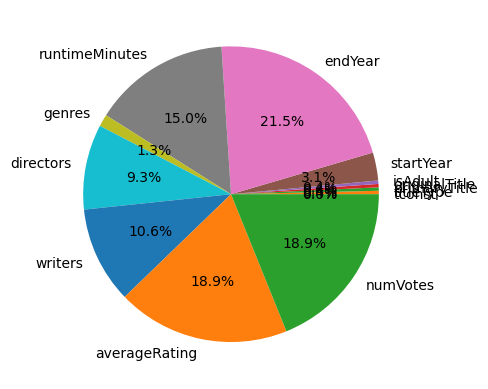

In [ ]:
import matplotlib.pyplot as plt 

dfgraphe = pd.DataFrame(df_film_f.isnull().sum(), columns = ['count'])
dfgraphe['category'] = dfgraphe.index
dfgraphe.reset_index
dfgraphe

category = dfgraphe['category'].unique()

fig, ax = plt.subplots()
ax.pie(x= dfgraphe['count'], labels=category, autopct = '%1.1f%%');



In [49]:
dfgraphe.sample(3)

,level_0,index,count,category
4,4,isAdult,194840,isAdult
1,1,titleType,194839,titleType
12,12,numVotes,9941570,numVotes


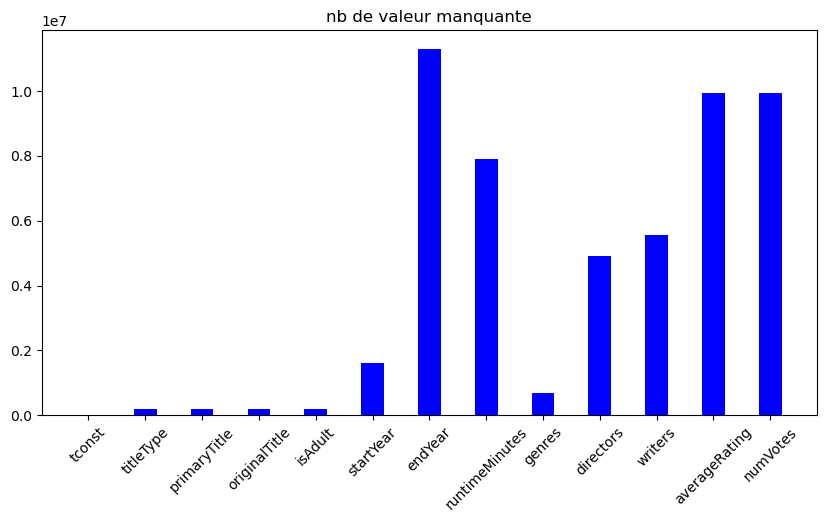

In [55]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x= dfgraphe['category'], height =dfgraphe['count'], color='blue', width= 0.4);
plt.xticks(rotation=45)
plt.title('nb de valeur manquante')
plt.show()

In [43]:

dfgraphe

,level_0,index,count,category
0,0,tconst,0,tconst
1,1,titleType,194839,titleType
2,2,primaryTitle,194858,primaryTitle
3,3,originalTitle,194858,originalTitle
4,4,isAdult,194840,isAdult
5,5,startYear,1611887,startYear
6,6,endYear,11310720,endYear
7,7,runtimeMinutes,7895461,runtimeMinutes
8,8,genres,696918,genres
9,9,directors,4900086,directors


In [7]:
df_film_f['tconst'].nunique()

11442938